In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!pip install keras-resnet

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from PIL import Image
import keras
%matplotlib inline
from sklearn.utils import shuffle
import cv2
#from resnets_utils import *
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/Project/Dataset_Aug_images/Train/",target_size=(224,224))
tsdata = ImageDataGenerator()
validdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/Project/Dataset_Aug_images/Valid/", target_size=(224,224))

Found 10853 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [0]:
img_height,img_width = 224,224 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.MobileNet(weights= None, include_top=False, input_shape= (img_height,img_width,3), dropout = 0.5)

In [0]:
x=base_model.output
#x=GlobalAveragePooling2D()(x)
#x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
#x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(512,activation='relu')(x) #dense layer 3
#x=Dropout(0.5)(x)
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation
model = Model(inputs = base_model.input, outputs = preds)

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [0]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("MobileNet_3.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=30,generator=traindata, validation_data= validdata,epochs=40,callbacks=[checkpoint,early])

Epoch 1/40
30/30 [==============================] - 9s 294ms/step - loss: 0.0948 - accuracy: 0.9677 - val_loss: 1.9623 - val_accuracy: 0.5030

Epoch 00001: val_accuracy improved from -inf to 0.50303, saving model to MobileNet_3.h5
Epoch 2/40
30/30 [==============================] - 8s 281ms/step - loss: 0.0838 - accuracy: 0.9646 - val_loss: 1.2495 - val_accuracy: 0.5121

Epoch 00002: val_accuracy improved from 0.50303 to 0.51212, saving model to MobileNet_3.h5
Epoch 3/40
30/30 [==============================] - 8s 282ms/step - loss: 0.1163 - accuracy: 0.9635 - val_loss: 0.7044 - val_accuracy: 0.5803

Epoch 00003: val_accuracy improved from 0.51212 to 0.58030, saving model to MobileNet_3.h5
Epoch 4/40
30/30 [==============================] - 8s 281ms/step - loss: 0.1186 - accuracy: 0.9656 - val_loss: 0.4768 - val_accuracy: 0.7394

Epoch 00004: val_accuracy improved from 0.58030 to 0.73939, saving model to MobileNet_3.h5
Epoch 5/40
30/30 [==============================] - 8s 280ms/step -

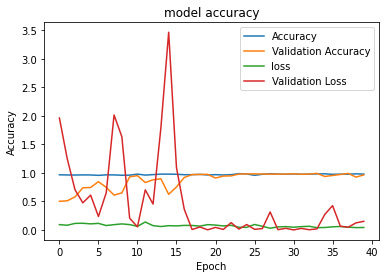

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

#Testing

In [0]:
test_datagen = ImageDataGenerator()
test_data_dir = "/content/drive/My Drive/Project/Test/test/"
print('Total number of images for "testing":')
dataset_test = test_datagen.flow_from_directory(
test_data_dir,
target_size = (224, 224),
batch_size = 10,
class_mode = "categorical",
shuffle=False)

Total number of images for "testing":
Found 256 images belonging to 2 classes.


In [0]:
#Predict accuracy for test set
loss, accuracy = model.evaluate_generator(dataset_test)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.953125  ;  loss = 0.076346 
